In [2]:
import pandas as pd
import numpy as np

In [3]:
df_cols= ['vendor','transaction_id','correlation_id','machine_id','room_id','client_account_id','branch_id','machine_type',
          'use_type','cycle_type','amount','user_category','payment_type','payment_details','user_id','result','failure_reason',
          'trans_details','card_number_last_four','card_type','provider_details','payment_gateway','mobile_device_info','machine_started',
          'event_timestamp','event_received_timestamp','created_at','updated_at']

In [4]:
pre= pd.read_csv('pre.csv', header=None, names= df_cols, low_memory=False)
pre['period']='pre_15'
camp= pd.read_csv('camp.csv', header=None, names= df_cols, low_memory=False)
camp['period']='campaign'
post= pd.read_csv('post.csv', header=None, names= df_cols, low_memory=False)
post['period']='post_15'

In [5]:
df= pd.concat([pre, camp, post], axis=0)

In [6]:
df.period.unique()

array(['pre_15', 'campaign', 'post_15'], dtype=object)

In [7]:
df['result'].loc[df.payment_type == 'App']= 'Success'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
df['result'].loc[df.payment_type == 'App'].unique()

array(['Success'], dtype=object)

In [9]:
df = df.loc[df.result== 'Success']

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.period.unique()

array(['pre_15', 'campaign', 'post_15'], dtype=object)

In [12]:
df['amount']= df.amount/100

In [21]:
df.groupby('payment_type')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
payment_type,,,,,,,,
App,26790.0,1.669373,0.450206,0.00,1.50,1.75,1.75,2.75
Coin,5062.0,1.561241,0.771247,0.25,1.25,1.75,2.25,2.75
CreditCard-OP,327.0,1.752294,0.283416,1.50,1.50,1.75,2.00,2.75
CreditCard-SR,20670.0,1.724369,0.470633,0.25,1.50,1.75,2.00,3.50
CreditCard-VO,632.0,1.747231,0.610503,0.25,1.50,2.00,2.25,2.75


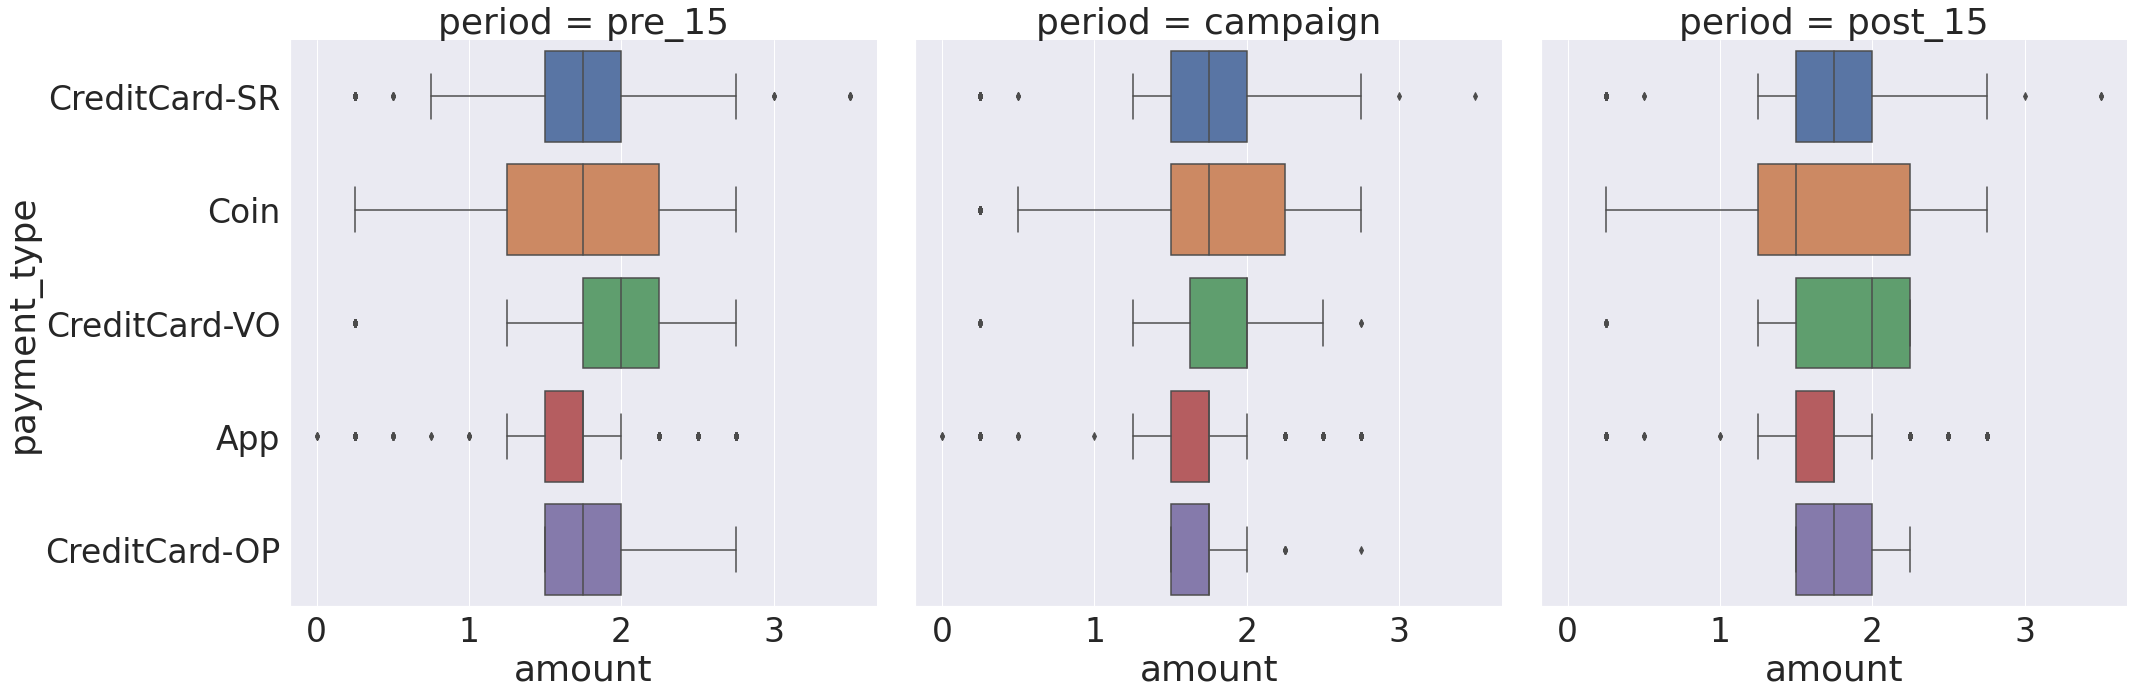

In [17]:
sns.set(font_scale=3)
sns.catplot(y="payment_type", x="amount", col="period",
                data=df, kind="box", orient= 'h',
                height=10, aspect=1)

In [15]:
#sns.set(font_scale=2)
#sns.catplot(x="amount", y="payment_type", row="period", kind="box",  height=5, aspect=2, data= df)

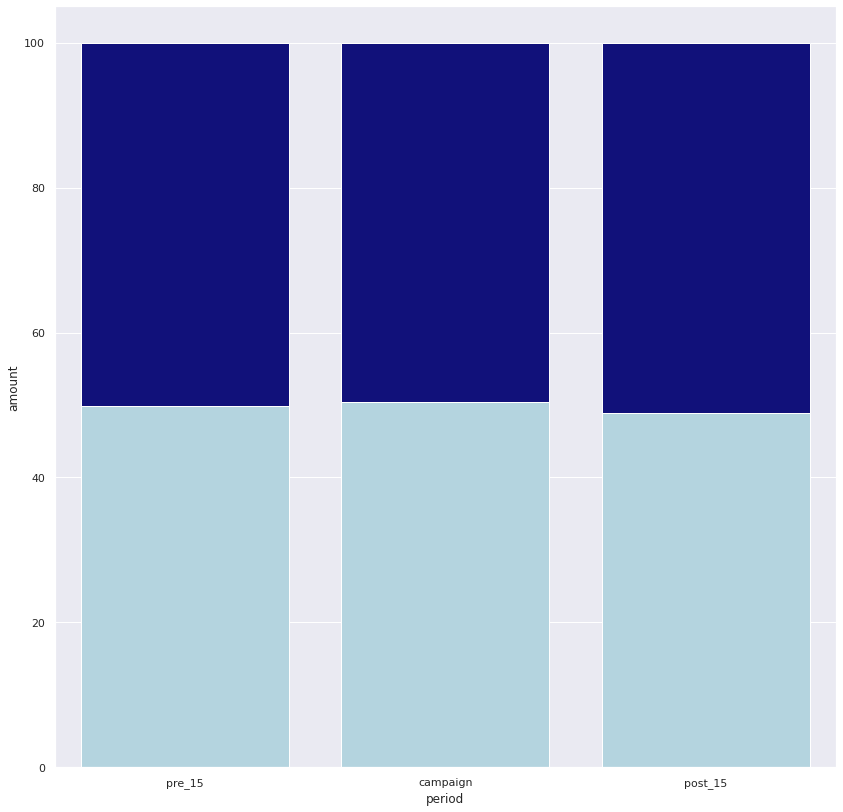

In [39]:
plt.figure(figsize=(14, 14))
sns.set(font_scale=1)
total = df.groupby('period')['amount'].sum().reset_index()
app = df[df.payment_type=='App'].groupby('period')['amount'].sum().reset_index()
app['amount'] = [i / j * 100 for i,j in zip(app['amount'], total['amount'])]
total['amount'] = [i / j * 100 for i,j in zip(total['amount'], total['amount'])]

bar1 = sns.barplot(x="period",  y="amount", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="period", y="amount", data=app, color='lightblue', order =['pre_15', 'campaign', 'post_15'])


In [43]:
df.groupby(['period', 'payment_type']).amount.sum().reset_index().pivot(index='payment_type', columns= 'period', values='amount')

period,campaign,post_15,pre_15
payment_type,,,
App,8374.10,8805.95,27542.45
Coin,1434.75,1540.25,4928.00
CreditCard-OP,100.50,133.75,338.75
CreditCard-SR,6522.60,7312.55,21807.55
CreditCard-VO,195.75,219.00,689.50


In [78]:
pd.crosstab(df.payment_type, df.period, df.amount, aggfunc='sum',margins= True)[['pre_15','campaign','post_15','All']]

period,pre_15,campaign,post_15,All
payment_type,,,,
App,27542.45,8374.10,8805.95,44722.50
Coin,4928.00,1434.75,1540.25,7903.00
CreditCard-OP,338.75,100.50,133.75,573.00
CreditCard-SR,21807.55,6522.60,7312.55,35642.70
CreditCard-VO,689.50,195.75,219.00,1104.25
All,55306.25,16627.70,18011.50,89945.45


In [77]:
pd.crosstab(df.vendor, df.period, df.amount, aggfunc='sum',margins= True)[['pre_15','campaign','post_15','All']]

period,pre_15,campaign,post_15,All
vendor,,,,
DI,55306.25,16627.7,18011.5,89945.45
All,55306.25,16627.7,18011.5,89945.45


In [66]:
app= df.loc[df.payment_type== 'App']

In [74]:
pd.crosstab(app.user_id, app.period, app.amount, aggfunc='sum')[['pre_15','campaign','post_15']].fillna(0).sort_values(by= ['pre_15', 'campaign','post_15'], ascending=False)

period,pre_15,campaign,post_15
user_id,,,
57301.0,164.75,60.50,61.50
486451.0,143.00,21.50,10.50
448870.0,130.00,65.00,52.25
419867.0,121.25,40.75,45.50
13824.0,116.00,45.75,23.00
...,...,...,...
570447.0,1.25,1.25,0.00
47857.0,1.25,0.00,1.25
777770.0,1.25,0.00,1.25
